Real Estate market is a type of market wher the sales and purchases between sellsers and buyers refer to the exchange of real estate of anykind, such as housing land, commercial and premises and so on.


---
Regression analysis is the statistical process of studying the relationship between a set of independent variables (explanatory varaibles and the dependent varaible (response variable)




*   Number of instances : 506
*   Number of attribtes: 14 continuous attributes (including the class attribute medv) and one binary-valued attribute


1.   crim: per capita crime rate by town

1.   zn: proportion of residential land zoned for lots over 25000 square feet

1.   indus: Proportion of nonretail business acres per town
2.   chas: Charles River dummy variable (= 1 if tract bounds river; 0: otherwise)


2.   nox: Nitrix oxides concentration (parts per 10 million)


2.   rm: Average number of rooms per dwelling



1.   age: Proportion of owner-occupied units built before 1940
2.   dis: Weighted distances to five Boston employment centers


1.   Rad: index of accessibility to the radial highways
2.   ptratio: Pupil teacher ratio by town


*   black:  1000(BK=0.63)^2 where Bk is the proportion of blacks by town
*   lstat: Percent of the lower status of the population


*   medv: Median value of owner-occupied homes in $1000
medv is the response variable









In [ ]:
import pandas as pd


In [ ]:
BHNames = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url,delim_whitespace=True, names=BHNames)


In [ ]:
print(data.head(20))

       crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  .

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
summary = data.describe()
summary = summary.transpose()
print(summary)

         count        mean         std  ...        50%         75%       max
crim     506.0    3.613524    8.601545  ...    0.25651    3.677082   88.9762
zn       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
indus    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
chas     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
nox      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
rm       506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
age      506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
dis      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
rad      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
tax      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
ptratio  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
black    506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000

x(scaled) = (x - x(min))/(x(max)-x(min))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data)) # it computes the minimum and maximum that is to be used for later scaling

MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
DataScaled = scaler.fit_transform(data)
DataScaled = pd.DataFrame(DataScaled,columns=BHNames)
summary = DataScaled.describe()
summary=summary.transpose()
print(summary)

         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    506.0  0.301409 

Lower Whisker -> 25 percentile -> median (50 percentile) -> 75 percentile -> upper Whisker

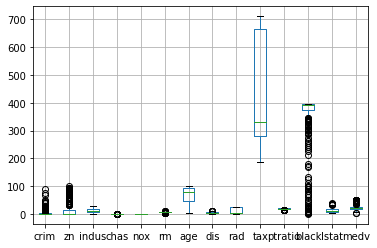

In [ ]:
import matplotlib.pyplot as plt
boxplot = data.boxplot(column=BHNames)
plt.show()

There are 3 methods of correlation coefficient:


1.   Pearson (standard correlation coefficient)

1.   Kendall (Kendall Tau correlation coefficient)
2.   spearman (Spearman rank correlation)






In [ ]:
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows',None,'display.max_columns', CorData.shape[1]):
  print(CorData)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

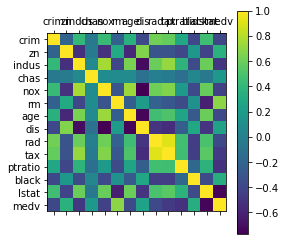

In [ ]:
# plot correlogram is a graph of correlation matrix
plt.matshow(CorData)
# set the current tick locations and labels of the x-axis and y-axis
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
#divide the predictor(X) and target(Y)
X = DataScaled.drop('medv',axis = 1)
print(X.describe())
Y = DataScaled['medv']
print(Y.describe())

             crim          zn       indus  ...     ptratio       black       lstat
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     0.040544    0.113636    0.391378  ...    0.622929    0.898568    0.301409
std      0.096679    0.233225    0.251479  ...    0.230313    0.230205    0.197049
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000851    0.000000    0.173387  ...    0.510638    0.945730    0.144040
50%      0.002812    0.000000    0.338343  ...    0.686170    0.986232    0.265728
75%      0.041258    0.125000    0.646628  ...    0.808511    0.998298    0.420116
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 13 columns]
count    506.000000
mean       0.389618
std        0.204380
min        0.000000
25%        0.267222
50%        0.360000
75%        0.444444
max        1.000000
Name: medv, dtype: float64


In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ',X_test.shape)
print('Y train shape = ',Y_train.shape)

print('Y test shape = ',Y_test.shape)

X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y test shape =  (152,)




*   Import Sequential classs from keras.models

*   stack the layers using .add() method
*   Configure the learning process using .compile() method


*   Train the model on the train dataset using .fit() method



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics



1.   Sequential class: This is used to define a linear stack of network layers that make up a model. We will use the Sequential constructor to create the mode, which will be enriched with layers using the add() method

1.   Dense class: this is used to instantiate a Dense layer, which is the basic feedforward fully connected layer.
2.   Metric class: This is a function that is used to evaluate the performnace of the model.



In [ ]:
model = Sequential()
model.add(Dense(20,input_dim=13,activation = 'relu'))
model.add(Dense(10, activation = 'relu'))

model.add(Dense(1, activation = 'linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])




1.   adam optimizer: This is an alogorithm for the first-order, gradient-based optimization of stochastic objective functions based on adaptive estimates of lower order moments

1.   The mean_squared_error: loss function. it measures the varege of the squares of the errors
2.   Accuracy metric: function that is used to evaluate the performance of the model durnoiing the training and testing






In [ ]:
model.fit(X_train,Y_train, epochs=1000, verbose = 1)

Epoch 1/1000
12/12 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.0015
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.0121
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.0117
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.0074
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.0064
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.0083
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.0106
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.0153
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.0071
Epoch 10/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.0239

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_predKM = model.predict(X_test)

In [ ]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Keras Model')
print(score[0])

Keras Model
0.006955331191420555


In [ ]:
from sklearn.linear_model import LinearRegression
LModel = LinearRegression()
LModel.fit(X_train, Y_train)
Y_predLM = LModel.predict(X_test)

Text(0.5, 1.0, 'Neural Network Model')

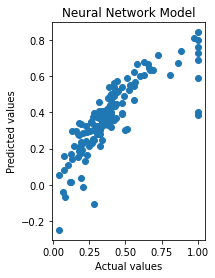

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Neural Network Model")



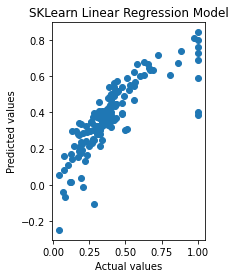

In [ ]:
plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_predLM)
print('Linear Regression Model')
print(mse)
#Keras Model
0.006955331191420555

Linear Regression Model
0.015159030964982022
